In [1]:
# We need to load drawsvg before using it in jupyterlite


In [2]:
%pip install -q drawsvg hyperbolic ipywidgets

Note: you may need to restart the kernel to use updated packages.


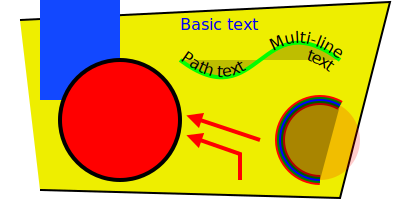

In [3]:
# Examples

### Basic drawing elements
import drawsvg as draw

d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
#d.save_svg('example.svg')
#d.save_png('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG



In [4]:

### SVG-native animation with playback controls
import drawsvg as draw

d = draw.Drawing(400, 200, origin='center',
        animation_config=draw.types.SyncedAnimationConfig(
            # Animation configuration
            duration=8,  # Seconds
            show_playback_progress=True,
            show_playback_controls=True))
d.append(draw.Rectangle(-200, -100, 400, 200, fill='#eee'))  # Background
d.append(draw.Circle(0, 0, 40, fill='green'))  # Center circle

# Animation
circle = draw.Circle(0, 0, 0, fill='gray')  # Moving circle
circle.add_key_frame(0, cx=-100, cy=0,    r=0)
circle.add_key_frame(2, cx=0,    cy=-100, r=40)
circle.add_key_frame(4, cx=100,  cy=0,    r=0)
circle.add_key_frame(6, cx=0,    cy=100,  r=40)
circle.add_key_frame(8, cx=-100, cy=0,    r=0)
d.append(circle)
r = draw.Rectangle(0, 0, 0, 0, fill='silver')  # Moving square
r.add_key_frame(0, x=-100, y=0,       width=0,  height=0)
r.add_key_frame(2, x=0-20, y=-100-20, width=40, height=40)
r.add_key_frame(4, x=100,  y=0,       width=0,  height=0)
r.add_key_frame(6, x=0-20, y=100-20,  width=40, height=40)
r.add_key_frame(8, x=-100, y=0,       width=0,  height=0)
d.append(r)

# Changing text
draw.native_animation.animate_text_sequence(
        d,
        [0, 2, 4, 6],
        ['0', '1', '2', '3'],
        30, 0, 1, fill='yellow', center=True)

# Save as a standalone animated SVG or HTML
d.save_svg('playback-controls.svg')
d.save_html('playback-controls.html')

# Display in Jupyter notebook
#d.display_image()  # Display SVG as an image (will not be interactive)
#d.display_iframe()  # Display as interactive SVG (alternative)
#d.as_gif('orbit.gif', fps=10)  # Render as a GIF image, optionally save to file
#d.as_mp4('orbig.mp4', fps=60, verbose=True)  # Render as an MP4 video, optionally save to file
#d.as_spritesheet('orbit-spritesheet.png', row_length=10, fps=3)  # Render as a spritesheet
d.display_inline()  # Display as interactive SVG


JupyterSvgInline(svg='<?xml version="1.0" encoding="UTF-8"?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"\n     width="400" height="200" viewBox="-200.0 -100.0 400 200" onload="svgOnLoad(event);">\n<defs>\n</defs>\n<rect x="-200" y="-100" width="400" height="200" fill="#eee" />\n<circle cx="0" cy="0" r="40" fill="green" />\n<circle cx="0" cy="0" r="0" fill="gray">\n<animate attributeName="cx" dur="8s" values="-100;0;100;0;-100" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n<animate attributeName="cy" dur="8s" values="0;-100;0;100;0" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n<animate attributeName="r" dur="8s" values="0;40;0;40;0" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n</circle>\n<rect x="0" y="0" width="0" height="0" fill="silver">\n<animate attributeName="x" dur="8s" values="-100;-20;100;-20;-100" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n<animate attributeName="y" dur="8s" values="0;-120;0;80;0" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n<animate attributeName="width" dur="8s" values="0;40;0;40;0" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n<animate attributeName="height" dur="8s" values="0;40;0;40;0" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" />\n</rect>\n<text x="0" y="1" font-size="30" fill="yellow" text-anchor="middle" dominant-baseline="central">0<animate attributeName="visibility" dur="8s" values="visible;hidden;hidden" keyTimes="0;0.25;1" repeatCount="indefinite" fill="freeze" /></text>\n<text x="0" y="1" font-size="30" fill="yellow" text-anchor="middle" dominant-baseline="central">1<animate attributeName="visibility" dur="8s" values="hidden;visible;hidden;hidden" keyTimes="0;0.25;0.5;1" repeatCount="indefinite" fill="freeze" /></text>\n<text x="0" y="1" font-size="30" fill="yellow" text-anchor="middle" dominant-baseline="central">2<animate attributeName="visibility" dur="8s" values="hidden;hidden;visible;hidden;hidden" keyTimes="0;0.25;0.5;0.75;1" repeatCount="indefinite" fill="freeze" /></text>\n<text x="0" y="1" font-size="30" fill="yellow" text-anchor="middle" dominant-baseline="central">3<animate attributeName="visibility" dur="8s" values="hidden;hidden;visible;visible" keyTimes="0;0.5;0.75;1" repeatCount="indefinite" fill="freeze" /></text>\n<g id="scrub">\n<path d="M-168.0,90.0 L168.0,90.0" stroke="#ccc" stroke-width="4" stroke-linecap="round" />\n<rect x="-168.0" y="90.0" width="0" height="0.001" stroke="#05f" stroke-width="4" stroke-linejoin="round">\n<animate attributeName="width" dur="8s" values="0;336" keyTimes="0;1" repeatCount="indefinite" fill="freeze" />\n</rect>\n<g id="scrub-capture" data-xmin="-168.0" data-xmax="168.0" data-totaldur="8" data-startdelay="0" data-enddelay="0" data-pauseonload="0">\n<rect x="-170.0" y="80.0" width="340" height="20" fill="rgba(255,255,255,0)" />\n<circle cx="-168.0" cy="90.0" r="6" fill="#05f" id="scrub-knob" visibility="hidden">\n<animate attributeName="cx" dur="8s" values="-168.0;168.0" keyTimes="0;1" repeatCount="indefinite" fill="freeze" />\n</circle>\n</g>\n<g id="scrub-play" visibility="hidden">\n<rect x="-191.0" y="86.0" width="8" height="8" fill="#05f" stroke="#05f" stroke-width="8" stroke-linejoin="round" />\n<path d="M-191.0,86.0 v8.0 l8.0,-4.0 Z" fill="#eee" />\n</g>\n<g id="scrub-pause" visibility="hidden">\n<rect x="-191.0" y="86.0" width="8" height="8" fill="#05f" stroke="#05f" stroke-width="8" stroke-linejoin="round" />\n<rect x="-190.0" y="86.0" width="2.0" height="8.0" fill="#eee" />\n<rect x="-186.0" y="86.0" width="2.0" height="8.0" fill="#eee" />\n</g>\n</g>\n<script>/*<![CDATA[*/\n/* Animation playback controls generated by drawsvg */\n/* https://github.com/cduck/drawsvg/ */\nfunction svgOnLoad(event) {\n    /* Support standalone SVG or embedded in HTML or iframe */\n    if (event && event.target && event.target.o

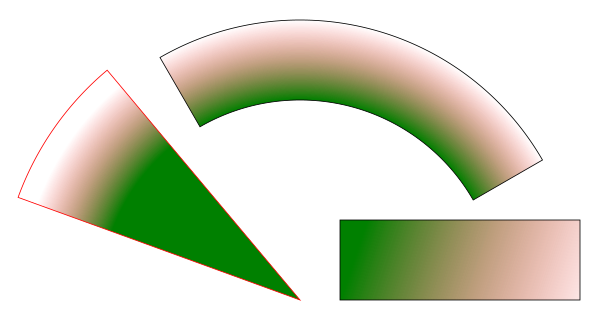

In [5]:
### Patterns and gradients
import drawsvg as draw

d = draw.Drawing(1.5, 0.8, origin='center')

# Background pattern (not supported by Cairo, d.rasterize() will not show it)
pattern = draw.Pattern(width=0.13, height=0.23)
pattern.append(draw.Rectangle(0, 0, .1, .1, fill='yellow'))
pattern.append(draw.Rectangle(0, .1, .1, .1, fill='orange'))
d.draw(draw.Rectangle(-0.75, -0.5, 1.5, 1, fill=pattern, fill_opacity=0.4))

# Create gradient
gradient = draw.RadialGradient(0, 0.35, 0.7*10)
gradient.add_stop(0.5/0.7/10, 'green', 1)
gradient.add_stop(1/10, 'red', 0)

# Draw a shape to fill with the gradient
p = draw.Path(fill=gradient, stroke='black', stroke_width=0.002)
p.arc(0, 0.35, 0.7, -30, -120, cw=False)
p.arc(0, 0.35, 0.5, -120, -30, cw=True, include_l=True)
p.Z()
d.append(p)

# Draw another shape to fill with the same gradient
p = draw.Path(fill=gradient, stroke='red', stroke_width=0.002)
p.arc(0, 0.35, 0.75, -130, -160, cw=False)
p.arc(0, 0.35, 0, -160, -130, cw=True, include_l=True)
p.Z()
d.append(p)

# Another gradient
gradient2 = draw.LinearGradient(0.1, 0.35, 0.1+0.6, 0.35+0.2)
gradient2.add_stop(0, 'green', 1)
gradient2.add_stop(1, 'red', 0)
d.append(draw.Rectangle(0.1, 0.15, 0.6, 0.2,
                        stroke='black', stroke_width=0.002,
                        fill=gradient2))

# Display
d.set_render_size(w=600)
d


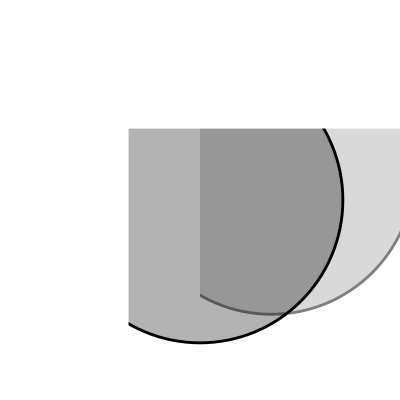

In [6]:
### Duplicate geometry and clip paths
import drawsvg as draw

d = draw.Drawing(1.4, 1.4, origin='center')

# Define clip path
clip = draw.ClipPath()
clip.append(draw.Rectangle(-.25, -.25, 1, 1))

# Draw a cropped circle
circle = draw.Circle(0, 0, 0.5,
        stroke_width='0.01', stroke='black',
        fill_opacity=0.3, clip_path=clip)
d.append(circle)

# Make a transparent copy, cropped again
g = draw.Group(opacity=0.5, clip_path=clip)
# Here, circle is not directly appended to the drawing.
# drawsvg recognizes that `Use` references `circle` and automatically adds
# `circle` to the <defs></defs> section of the SVG.
g.append(draw.Use(circle, 0.25, -0.1))
d.append(g)

# Display
d.set_render_size(400)
#d.rasterize()  # Display as PNG
d  # Display as SVG


In [7]:

### Organizing and duplicating drawing elements
import drawsvg as draw

d = draw.Drawing(300, 100)
d.set_pixel_scale(2)

# Use groups to contain other elements
# Children elements of groups inherit the coordinate system (transform)
# and attribute values
group = draw.Group(fill='orange', transform='rotate(-20)')
group.append(draw.Rectangle(0, 10, 20, 40))  # This rectangle will be orange
group.append(draw.Circle(30, 40, 10))  # This circle will also be orange
group.append(draw.Circle(50, 40, 10, fill='green'))  # This circle will not
d.append(group)

# Use the Use element to make duplicates of elements
# Each duplicate can be placed at an offset (x, y) location and any additional
# attributes (like fill color) are inherited if the element didn't specify them.
d.append(draw.Use(group, 80, 0, stroke='black', stroke_width=1))
d.append(draw.Use(group, 80, 20, stroke='blue', stroke_width=2))
d.append(draw.Use(group, 80, 40, stroke='red', stroke_width=3))

d.display_inline()


JupyterSvgInline(svg='<?xml version="1.0" encoding="UTF-8"?>\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"\n     width="600" height="200" viewBox="0 0 300 100">\n<defs>\n<g fill="orange" transform="rotate(-20)" id="WbfkTsmH0">\n<rect x="0" y="10" width="20" height="40" />\n<circle cx="30" cy="40" r="10" />\n<circle cx="50" cy="40" r="10" fill="green" />\n</g>\n</defs>\n<use xlink:href="#WbfkTsmH0" />\n<use xlink:href="#WbfkTsmH0" x="80" y="0" stroke="black" stroke-width="1" />\n<use xlink:href="#WbfkTsmH0" x="80" y="20" stroke="blue" stroke-width="2" />\n<use xlink:href="#WbfkTsmH0" x="80" y="40" stroke="red" stroke-width="3" />\n</svg>')

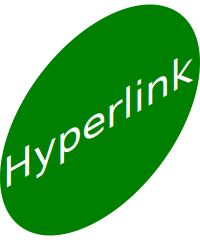

In [8]:

### Implementing other SVG tags
import drawsvg as draw

# Subclass DrawingBasicElement if it cannot have child nodes
# Subclass DrawingParentElement otherwise
# Subclass DrawingDef if it must go between <def></def> tags in an SVG
class Hyperlink(draw.DrawingParentElement):
    TAG_NAME = 'a'
    def __init__(self, href, target=None, **kwargs):
        # Other init logic...
        # Keyword arguments to super().__init__() correspond to SVG node
        # arguments: stroke_width=5 -> <a stroke-width="5" ...>...</a>
        super().__init__(href=href, target=target, **kwargs)

d = draw.Drawing(1, 1.2, origin='center')

# Create hyperlink
hlink = Hyperlink('https://www.python.org', target='_blank',
                  transform='skewY(-30)')
# Add child elements
hlink.append(draw.Circle(0, 0, 0.5, fill='green'))
hlink.append(draw.Text('Hyperlink', 0.2, 0, 0, center=0.6, fill='white'))

# Draw and display
d.append(hlink)
d.set_render_size(200)
d



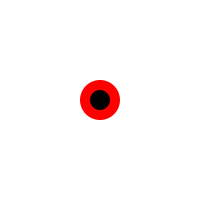

In [9]:
### Animation with the SVG Animate Tag
import drawsvg as draw

d = draw.Drawing(200, 200, origin='center')

# Animate the position and color of circle
c = draw.Circle(0, 0, 20, fill='red')
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate
c.append_anim(draw.Animate('cy', '6s', '-80;80;-80',
                           repeatCount='indefinite'))
c.append_anim(draw.Animate('cx', '6s', '0;80;0;-80;0',
                           repeatCount='indefinite'))
c.append_anim(draw.Animate('fill', '6s', 'red;green;blue;yellow',
                           calc_mode='discrete',
                           repeatCount='indefinite'))
d.append(c)

# Animate a black circle around an ellipse
ellipse = draw.Path()
ellipse.M(-90, 0)
ellipse.A(90, 40, 360, True, True, 90, 0)  # Ellipse path
ellipse.A(90, 40, 360, True, True, -90, 0)
ellipse.Z()
c2 = draw.Circle(0, 0, 10)
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate_motion
c2.append_anim(draw.AnimateMotion(ellipse, '3s',
                                  repeatCount='indefinite'))
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate_transform
c2.append_anim(draw.AnimateTransform('scale', '3s', '1,2;2,1;1,2;2,1;1,2',
                                     repeatCount='indefinite'))
d.append(c2)

d.save_svg('animated.svg')  # Save to file
d  # Display in Jupyter notebook


In [10]:

### Interactive Widget
import drawsvg as draw
from drawsvg.widgets import DrawingWidget
import hyperbolic.poincare as hyper  # python3 -m pip install hyperbolic
from hyperbolic import euclid

# Create drawing
d = draw.Drawing(2, 2, origin='center', context=draw.Context(invert_y=True))
d.set_render_size(500)
d.append(draw.Circle(0, 0, 1, fill='orange'))
group = draw.Group()
d.append(group)

# Update the drawing based on user input
click_list = []
def redraw(points):
    group.children.clear()
    for x1, y1 in points:
        for x2, y2 in points:
            if (x1, y1) == (x2, y2): continue
            p1 = hyper.Point.from_euclid(x1, y1)
            p2 = hyper.Point.from_euclid(x2, y2)
            if p1.distance_to(p2) <= 2:
                line = hyper.Line.from_points(*p1, *p2, segment=True)
                group.draw(line, hwidth=0.2, fill='white')
    for x, y in points:
        p = hyper.Point.from_euclid(x, y)
        group.draw(hyper.Circle.from_center_radius(p, 0.1),
                   fill='green')
redraw(click_list)

# Create interactive widget and register mouse events
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        click_list.append((x, y))
    redraw(click_list)
    widget.refresh()
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        redraw(click_list + [(x, y)])
    widget.refresh()
widget


<IPython.core.display.Javascript object>

DrawingWidget()

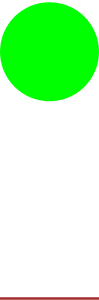

In [11]:
### Frame-by-Frame Animation
import drawsvg as draw

# Draw a frame of the animation
def draw_frame(t):
    d = draw.Drawing(2, 6.05, origin=(-1, -5))
    d.set_render_size(h=300)
    d.append(draw.Rectangle(-2, -6, 4, 8, fill='white'))
    d.append(draw.Rectangle(-1, 1, 2, 0.05, fill='brown'))
    t = (t + 1) % 2 - 1
    y = t**2 * 4 - 4
    d.append(draw.Circle(0, y, 1, fill='lime'))
    return d

with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
# Or:
#with draw.frame_animate_video('example6.gif', draw_frame, duration=0.05) as anim:
# Or:
#with draw.frame_animate_spritesheet('example6.png', draw_frame, row_length=10) as anim:
    # Add each frame to the animation
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)


In [12]:
### Asynchronous Frame-based Animation in Jupyter
# Jupyter cell 1:
import drawsvg as draw
from drawsvg.widgets import AsyncAnimation
widget = AsyncAnimation(fps=10)
widget


AsyncAnimation(frame_delay=100)

In [13]:
# Jupyter cell 2:
global_variable = 'a'
@widget.set_draw_frame  # Animation above is automatically updated
def draw_frame(secs=0):
    # Draw something...
    d = draw.Drawing(100, 40)
    d.append(draw.Text(global_variable, 20, 0, 30))
    d.append(draw.Text('{:0.1f}'.format(secs), 20, 30, 30))
    return d


In [14]:

# Jupyter cell 3:
global_variable = 'b'  # Animation above now displays 'b'


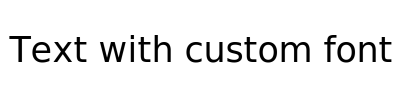

In [15]:
### Embed custom fonts
import drawsvg as draw

d = draw.Drawing(400, 100, origin='center')
d.embed_google_font('Permanent Marker', text=set('Text with custom font'))

d.append(draw.Text('Text with custom font', 35, 0, 0, center=True,
                   font_family='Permanent Marker', font_style='italic'))

d.save_svg('font.svg')
d  # Custom fonts work in most browsers but not in rasterize(), save_png(), or save_video()
